In [2]:
import tensorflow as tf
from datasets.reader import mnist as mnist_reader
slim = tf.contrib.slim
layers = tf.contrib.layers
from tensorflow.python.ops import variable_scope
import numpy as np
from matplotlib import pyplot as plt
import losses_fn

In [ ]:
print('Loower'.lower())

In [ ]:
def search(pac, keyword):
    for i in dir(pac):
        if keyword in i.lower():
            print(i)

In [ ]:
search(tf, 'mul')

# real data

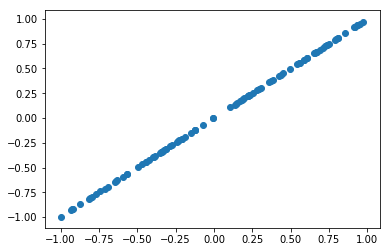

In [3]:
with tf.Graph().as_default():
    with tf.Session() as sess:
        random_noise = tf.random_uniform([100, 1])
        random_noise = (random_noise - 0.5)*2
        
        a_y = tf.constant([[1, 1]], tf.float32) #signal direction
        real_data = tf.multiply(a_y, random_noise)
        real_data = sess.run(real_data)
        fig = plt.figure()
        ax1 = fig.add_subplot(111)
        ax1.scatter(real_data[:, 0], real_data[:, 1])
        plt.show()

In [4]:
leaky_relu = lambda net: tf.nn.leaky_relu(net, alpha=0.01)
def generator(input_noise):
    gen_data = layers.fully_connected(input_noise, 2, activation_fn=None)
    return gen_data

def discriminator(data):
    logits = layers.fully_connected(data, 1, activation_fn=None)
    D_prob = tf.nn.sigmoid(logits)
    return D_prob

(1000, 2)


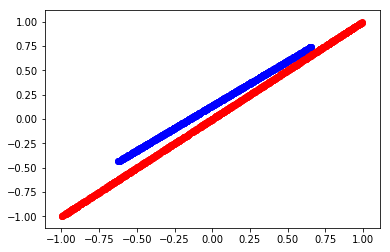

[<tf.Variable 'generator/fully_connected/weights:0' shape=(1, 2) dtype=float32_ref>, <tf.Variable 'generator/fully_connected/biases:0' shape=(2,) dtype=float32_ref>, <tf.Variable 'discriminator/fully_connected/weights:0' shape=(2, 1) dtype=float32_ref>, <tf.Variable 'discriminator/fully_connected/biases:0' shape=(1,) dtype=float32_ref>]
dis_weight [[-0.09639385]
 [-0.00659236]]
dis_bias [0.00164687]
[-0.04984623]
gen_weight [[-0.6395362 -0.5879945]]
gen_bias [0.01603375 0.1523853 ]


In [5]:
with tf.Graph().as_default():
    random_noise = tf.random_uniform([1000, 1])
    random_noise = (random_noise - 0.5)*2
        
    a_y = tf.constant([[1, 1]], tf.float32) #signal direction
    real_data = tf.multiply(a_y, random_noise)
    print(real_data.shape) # real_dataset
        
    with variable_scope.variable_scope('generator') as gen_scope:
        gen_data = generator(random_noise)
        
    with variable_scope.variable_scope('discriminator') as dis_scope:
        logits_real = discriminator(real_data)
    with variable_scope.variable_scope('discriminator', reuse=True):
        logits_gen = discriminator(gen_data)
        
    dis_var = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=dis_scope.name)
    gen_var = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=gen_scope.name)
        
    D_loss = -tf.reduce_mean(tf.log(logits_real) + tf.log(1. - logits_gen))
    G_loss = -tf.reduce_mean(tf.log(logits_gen))
        
    D_solver = tf.train.AdamOptimizer().minimize(D_loss, var_list=dis_var)
    G_solver = tf.train.AdamOptimizer().minimize(G_loss, var_list=gen_var)
    
    initializer = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(initializer)
        
        for i in range(1000):
            sess.run(D_solver)
            sess.run(G_solver)
            
        test_real = sess.run(real_data)
        test_gen = sess.run(gen_data)
        
        fig = plt.figure()
        ax1 = fig.add_subplot(111)
        ax1.scatter(test_gen[:, 0], test_gen[:, 1], c='b')
        ax1.scatter(test_real[:, 0], test_real[:, 1], c='r')
        plt.show()
        
        print(tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES))
        
        with variable_scope.variable_scope('discriminator', reuse=True):
            weight1 = tf.get_variable('fully_connected/weights')
            bias2 = tf.get_variable('fully_connected/biases')
            w = sess.run(weight1)
            b = sess.run(bias2)
            print('dis_weight', w)
            print('dis_bias', b)
            print(w[0]*0.5 + w[1]*0.5 + b)
            
        with variable_scope.variable_scope('generator', reuse=True):
            weight = tf.get_variable('fully_connected/weights')
            bias = tf.get_variable('fully_connected/biases')
            print('gen_weight', sess.run(weight))
            print('gen_bias', sess.run(bias))

In [18]:
with tf.Graph().as_default():
    random_noise = tf.random_uniform([1000, 1])
    random_noise = (random_noise - 0.5)*2
        
    a_y = tf.constant([[1, 1]], tf.float32) #signal direction
    real_data = tf.multiply(a_y, random_noise)
    print(real_data.shape) # real_dataset
        
    with variable_scope.variable_scope('generator') as gen_scope:
        gen_data = generator(random_noise)
        
    with variable_scope.variable_scope('discriminator') as dis_scope:
        logits_real = discriminator(real_data)
    with variable_scope.variable_scope('discriminator', reuse=True):
        logits_gen = discriminator(gen_data)
        
    dis_var = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=dis_scope.name)
    gen_var = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=gen_scope.name)
        
    D_loss = -tf.reduce_mean(tf.log(logits_real) + tf.log(1. - logits_gen))
    G_loss = -tf.reduce_mean(tf.log(logits_gen))
        
    D_solver = tf.train.AdamOptimizer().minimize(D_loss, var_list=dis_var)
    G_solver = tf.train.AdamOptimizer().minimize(G_loss, var_list=gen_var)
    
    initializer = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(initializer)
        
        for i in range(500):
            if i%100 == 0:
#                 with variable_scope.variable_scope('discriminator', reuse=True):
#                     weight1 = tf.get_variable('fully_connected/weights')
#                     bias2 = tf.get_variable('fully_connected/biases')
#                     w = sess.run(weight1)
#                     b = sess.run(bias2)
#                     print('dis_weight', w, '\n')
#                     print('dis_bias', b, '\n')
#                     print('prob : ', sess.run(tf.nn.sigmoid(w[0]*0.5 + w[1]*0.5 + b)), '\n') 
    
                    
                with variable_scope.variable_scope('generator', reuse=True):
                    weight = tf.get_variable('fully_connected/weights')
                    bias = tf.get_variable('fully_connected/biases')
                    print('gen_weight', sess.run(weight), '\n')
                    print('gen_bias', sess.run(bias), '\n')
            
            sess.run(D_solver)
        
#
        
        print(sess.run(logits_real[:10]))
        print(sess.run(logits_gen[:10]))
        

(1000, 2)
gen_weight [[0.41636634 0.08942521]] 

gen_bias [0. 0.] 

gen_weight [[0.41636634 0.08942521]] 

gen_bias [0. 0.] 

gen_weight [[0.41636634 0.08942521]] 

gen_bias [0. 0.] 

gen_weight [[0.41636634 0.08942521]] 

gen_bias [0. 0.] 

gen_weight [[0.41636634 0.08942521]] 

gen_bias [0. 0.] 

[[0.00685455]
 [1.930921  ]
 [0.        ]
 [0.787097  ]
 [0.8178372 ]
 [0.        ]
 [0.        ]
 [2.1531227 ]
 [0.        ]
 [0.        ]]
[[0.41918355]
 [0.13234968]
 [0.        ]
 [0.10516336]
 [0.03743601]
 [0.35609955]
 [0.        ]
 [0.14944415]
 [0.5306126 ]
 [0.4333098 ]]
